In [1]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.color import rgb2gray

(566, 705, 3)


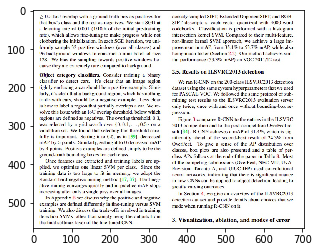

In [2]:
image = plt.imread('2.jpg')
print(image.shape)
plt.imshow(image)

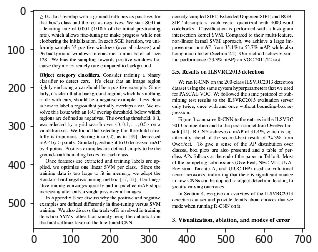

In [3]:
gray = rgb2gray(image)
plt.imshow(gray, cmap='gray')

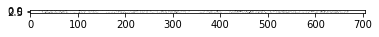

In [4]:
plt.imshow(gray[0:5], cmap='gray')

In [5]:
summ0 = gray.sum(axis = 0) #cумма по столбцам

In [6]:
summ0

array([566.        , 566.        , 566.        , 566.        ,
       566.        , 566.        , 566.        , 566.        ,
       566.        , 566.        , 566.        , 566.        ,
       566.        , 566.        , 566.        , 566.        ,
       554.9251    , 494.54370941, 408.18692745, 495.56242353,
       506.09005961, 465.36858039, 476.4511498 , 516.39648353,
       470.90668588, 466.17389255, 504.36421529, 498.26467176,
       473.19230863, 478.32814667, 489.36981059, 492.79806039,
       470.75772353, 479.72148431, 474.15943059, 480.30119098,
       471.41802078, 490.08915961, 478.96920353, 477.99809059,
       496.17536667, 483.95509961, 480.76369529, 489.06158784,
       500.24005569, 495.91201843, 493.02958039, 493.07571647,
       476.09585373, 479.96782314, 494.10379451, 488.45791333,
       476.20425059, 476.94976588, 472.86568824, 486.2610502 ,
       487.5275149 , 489.57571608, 489.49920196, 488.95757725,
       489.03818824, 498.1718149 , 494.26441137, 494.27

(900, 695, 3)


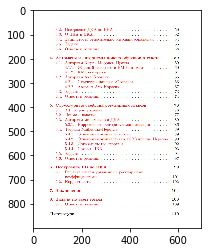

In [9]:
image3 = plt.imread('3.jpg')
print(image3.shape)
plt.imshow(image3)

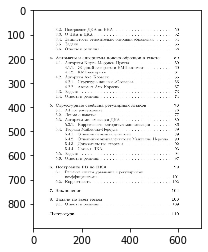

In [10]:
gray3 = rgb2gray(image3)
plt.imshow(gray3, cmap='gray')

In [11]:
summ1 = gray3.sum(axis = 0) #cумма по столбцам

In [12]:
summ1

array([900.        , 900.        , 900.        , 900.        ,
       900.        , 900.        , 900.        , 900.        ,
       900.        , 900.        , 900.        , 900.        ,
       900.        , 900.        , 900.        , 900.        ,
       900.        , 900.        , 900.        , 900.        ,
       900.        , 900.        , 900.        , 900.        ,
       900.        , 900.        , 900.        , 900.        ,
       900.        , 900.        , 900.        , 900.        ,
       900.        , 900.        , 900.        , 900.        ,
       900.        , 900.        , 900.        , 900.        ,
       900.        , 900.        , 900.        , 900.        ,
       900.        , 900.        , 900.        , 900.        ,
       900.        , 900.        , 900.        , 900.        ,
       900.        , 900.        , 900.        , 900.        ,
       900.        , 900.        , 900.        , 900.        ,
       900.        , 900.        , 900.        , 900.  

(844, 509, 4)
(1920, 1080, 4)
(1920, 1080, 4)


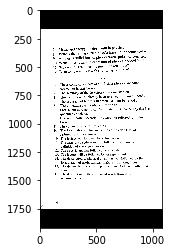

In [14]:
image4 = plt.imread('4.png')
print(image4.shape)
plt.imshow(image4)
gray4 = rgb2gray(image4)
plt.imshow(gray4, cmap='gray')
image5 = plt.imread('5.png')
print(image5.shape)
plt.imshow(image5)
gray5 = rgb2gray(image5)
plt.imshow(gray5, cmap='gray')
image6 = plt.imread('6.png')
print(image6.shape)
plt.imshow(image6)
gray6 = rgb2gray(image6)
plt.imshow(gray6, cmap='gray')

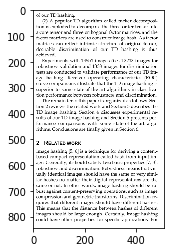

In [15]:
plt.imshow(image4)

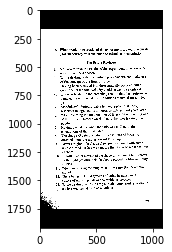

In [16]:
plt.imshow(image5)

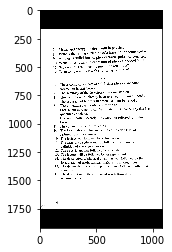

In [17]:
plt.imshow(image6)

In [18]:
summ4 = gray4.sum(axis = 0)
summ5 = gray5.sum(axis = 0)
summ6 = gray6.sum(axis = 0)

(665, 478, 3)


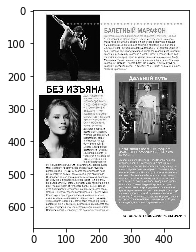

In [19]:
image7 = plt.imread('7.jpg')
print(image7.shape)
plt.imshow(image7)
gray7 = rgb2gray(image7)
plt.imshow(gray7, cmap='gray')
#plt.savefig('7_grey.png')

In [20]:
summ7 = gray7.sum(axis = 0)

Найдем максимум в $summ$: $maxx$, все, что входит в $maxx \cdot k$ будем считать хорошим, если есть последовательность из более чем $size$ пикселей, входящих в хороший диапазон, то будем относить к картинку к многоколончатой. 

Отсекаем края!

In [21]:
def stupid_compare(summ, pattern):
    if all(summ >= pattern):
        return True
    return False

In [22]:
%matplotlib inline

def detector(image, k = 0.99, size = 15):
    gray = rgb2gray(image)
    summ = gray.sum(axis = 0)
    maxx = max(summ)
    pattern = np.ones(size) * maxx * k
    i = 0
    #график
    plt.figure(figsize=(10, 8))
    fontsize=25
    plt.hlines(maxx * k, 0, gray.shape[1])
    plt.plot(summ, 'r', label = 'summ')
    plt.legend(fontsize=fontsize)
    #
    while summ[i] >= (maxx * k):
        i += 1
    j = 1
    while summ[len(summ) - j] >= (maxx * k):
        j += 1
    while i < len(summ)-size-1-j:
        if stupid_compare(summ[i:i+size], pattern):
            #print(summ[i:i+size], pattern)
            #print(i, j)
            return "Many columns"
        i += 1
    return "One Column"

Many columns


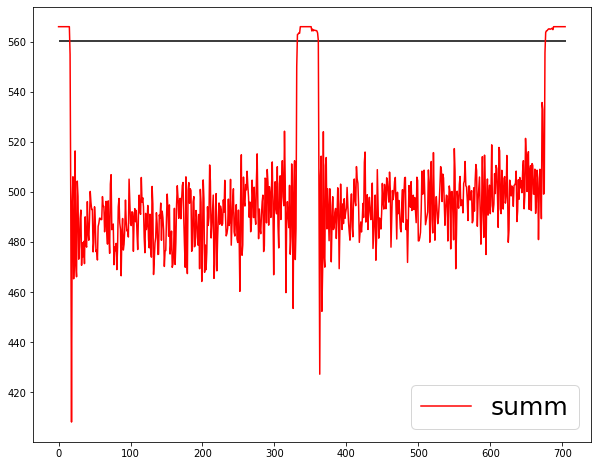

In [23]:
print(detector(image)) # 2 +

One Column


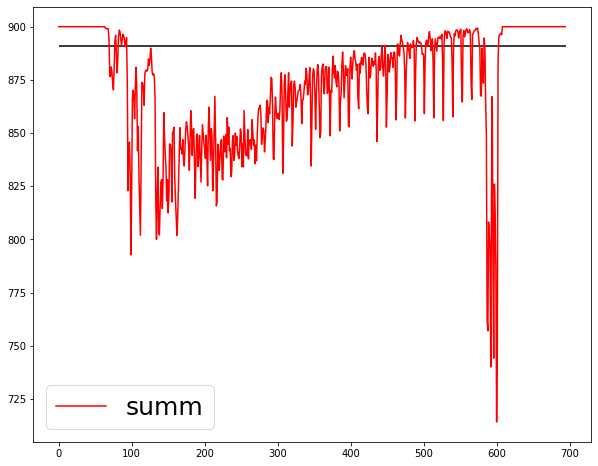

In [24]:
print(detector(image3)) # 1 +

One Column


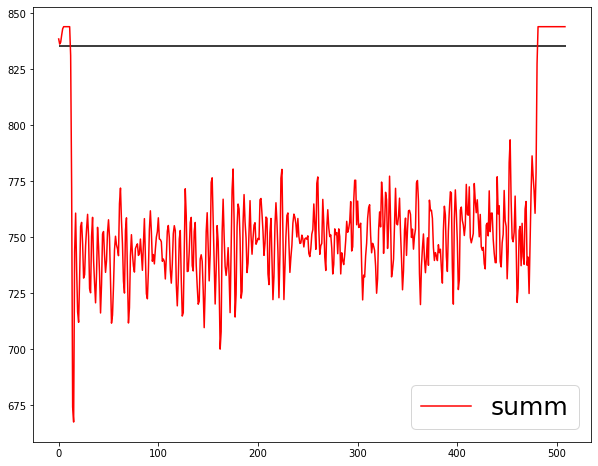

In [25]:
print(detector(image4)) # 1 + 

One Column


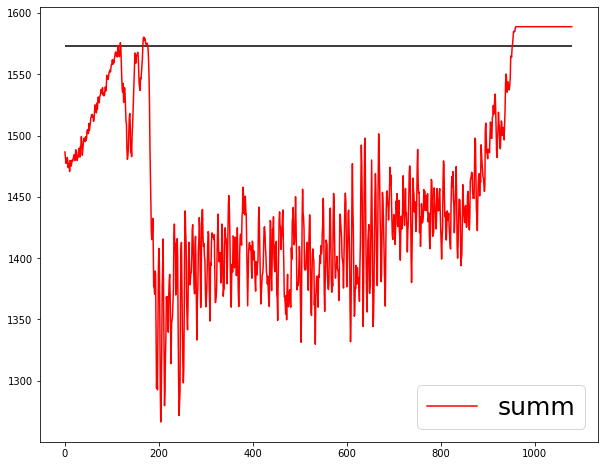

In [26]:
print(detector(image5)) # 1 +

Many columns


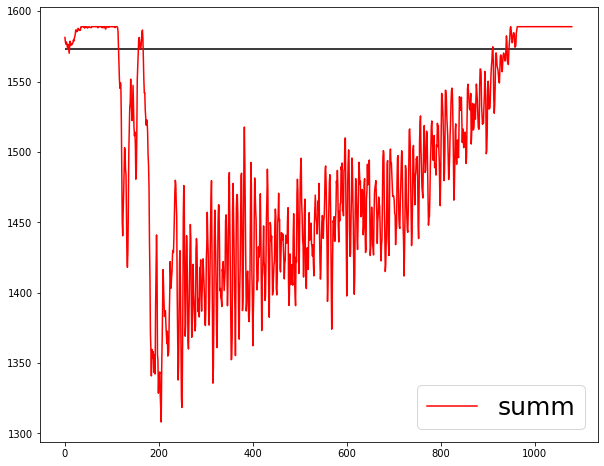

In [27]:
print(detector(image6)) # 1 +

Many columns


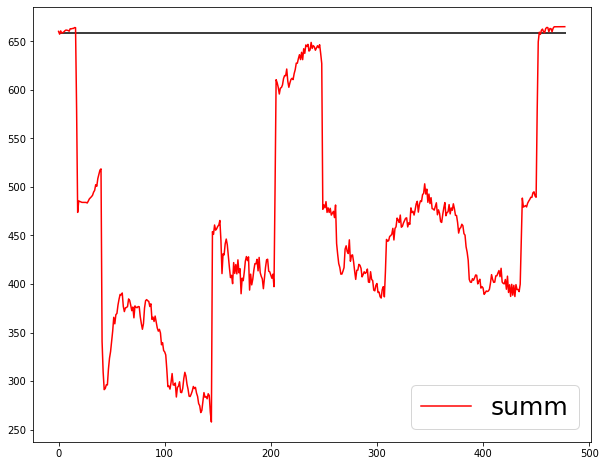

In [28]:
print(detector(image7)) # 2 - 

In [31]:
image10 = plt.imread('10.jpg')

In [32]:
image10 = plt.imread('10.jpg')
print(image10.shape)

(910, 798, 3)


One Column


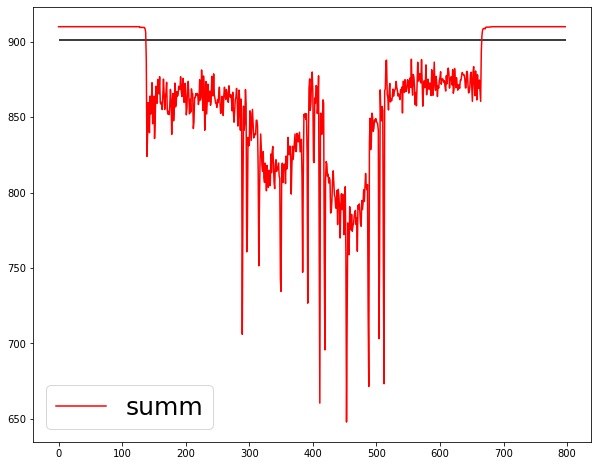

In [33]:
print(detector(image10))